# Титаник. Кто выживет?

https://www.kaggle.com/c/titanic/

In [60]:
import numpy as np
import pandas as pd

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

In [62]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# EDA

In [66]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
train.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [68]:
sns.boxplot?

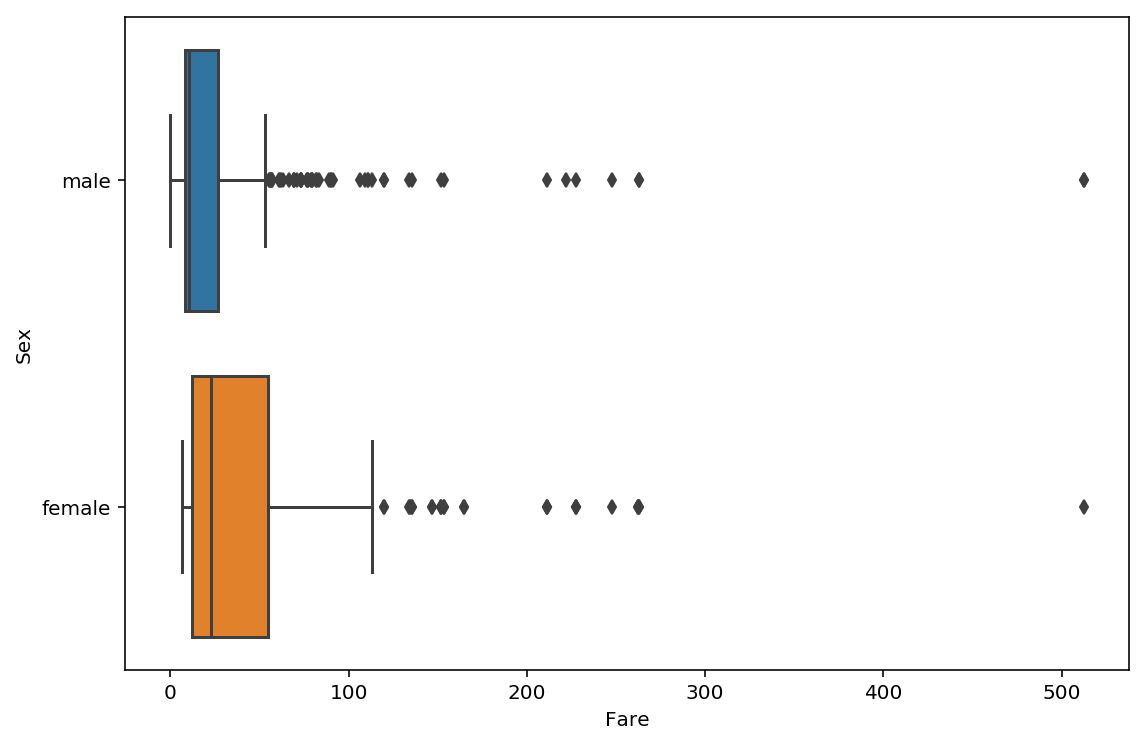

In [69]:
sns.boxplot(data=train, x='Fare', y='Sex')

In [70]:
train.groupby('Sex')['Pclass'].value_counts(normalize=True)

Sex     Pclass
female  3         0.458599
        1         0.299363
        2         0.242038
male    3         0.601386
        1         0.211438
        2         0.187175
Name: Pclass, dtype: float64

### Фичи

чтобы одинаковым образом обработать train и test и не дублировать все операции 2 раза, соединим эти два набора данных в один, не забыв при этом:
1. выкинуть целевую переменную из train
2. проверить на соответствие набора признаков друг другу
3. добавить флаг того, является ли объект тестовым или нет

In [71]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [72]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [73]:
train['is_test'] = 0
test['is_test'] = 1

In [74]:
df = pd.concat([train, test])

супер, теперь полный набор данных можно обрабатывать вместе и в любой момент, уже обработанными, обратно разъединить на обучающую и тестовую выборки

Пол male/female закодируем в 1/0 и удалим переменные, с которыми мы не будем сейчас работать

In [75]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})
df.drop(["Sex", "Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

признаки, значения которых составляют небольшой перечислимый набор, закодируем в отдельные столбцы 

In [76]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [77]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [78]:
df_dummies.head(10)

,Age,SibSp,Parch,Fare,is_test,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,0,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,0,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,0,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,0,1,0,1,0,0


In [79]:
df_dummies.isnull().sum()

Age           263
SibSp           0
Parch           0
Fare            1
is_test         0
isMale          0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [80]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [81]:
columns = X_train.columns

In [82]:
X_train.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,1,0,1,0,0


### Заполнение пустых значений

заполним пустые значения средними по соответственным признакам

In [83]:
from sklearn.preprocessing import Imputer

In [84]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [85]:
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [86]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

In [87]:
X_train_imputed.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.000000,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.000000,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.000000,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,29.699118,0.0,0.0,8.4583,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,54.000000,0.0,0.0,51.8625,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,2.000000,3.0,1.0,21.0750,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,27.000000,0.0,2.0,11.1333,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,14.000000,1.0,0.0,30.0708,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Нормировка значений

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

In [90]:
scaler.fit(X_train_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:
X_train_imputed_scaled = scaler.transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [92]:
X_train_imputed_scaled.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
5,0.000000,-0.474545,-0.473674,-0.478116,0.737695,-0.565685,-0.510152,0.902587,-0.482043,3.251373,-1.614710
6,1.870059,-0.474545,-0.473674,0.395814,0.737695,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
7,-2.131568,2.247470,0.767630,-0.224083,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
8,-0.207709,-0.474545,2.008933,-0.424256,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
9,-1.208115,0.432793,-0.473674,-0.042956,-1.355574,-0.565685,1.960202,-1.107926,2.074505,-0.307562,-1.614710


In [93]:
X_test_imputed_scaled = scaler.transform(imputer.transform(X_test))

### Offtop: попробуем визуализировать всех пассажиров: есть ли там кластеры?
### PCA + clustering

In [94]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=2)

In [96]:
ppl = pca.fit_transform(X_train_imputed_scaled)

всего 2 фичи объясняют 41% всего разнообразия пассажиров:

In [97]:
pca.explained_variance_ratio_.sum()

0.41017554160207303

классно, видно 6 кластеров пассажиров: внутри кластера они похожи друг на друга, межу кластерами - нет:

Text(0.5, 1.0, 'Пассажиры Титаника')

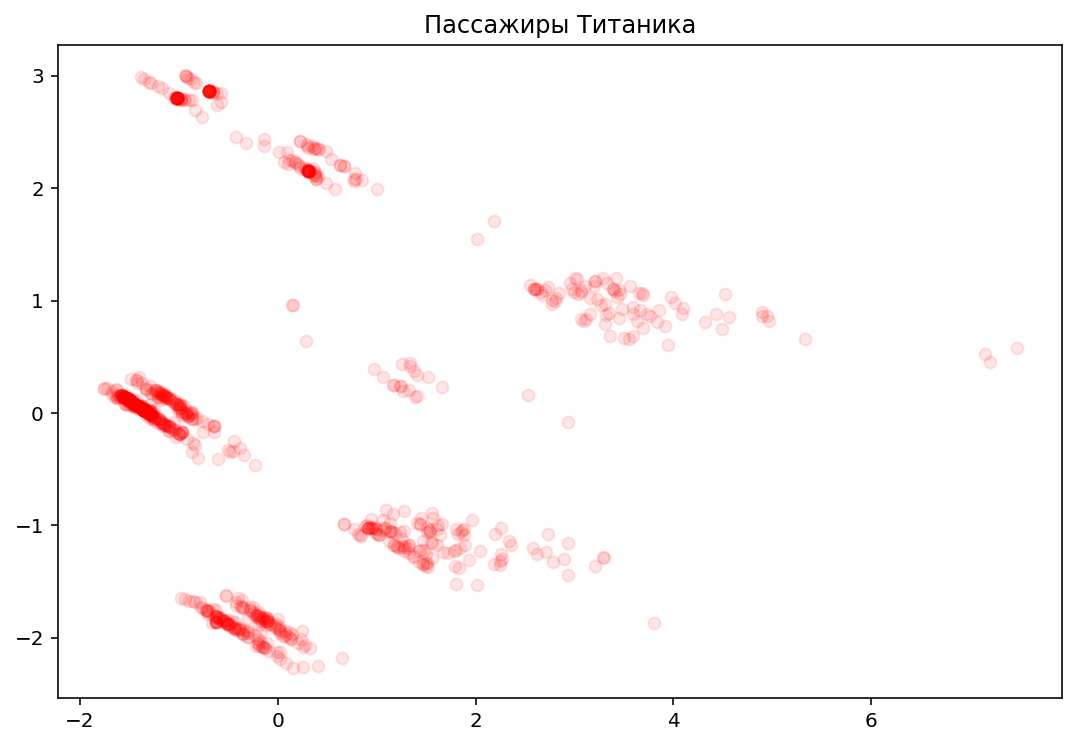

In [98]:
plt.plot(ppl[:,0], ppl[:,1], 'ro', alpha=0.1)
plt.title('Пассажиры Титаника')

можно попробовать кластеризовать по 7 кластерам и проверить, что получится:

In [99]:
from sklearn.cluster import KMeans

In [100]:
n_clusters = 7

In [101]:
kmeans = KMeans(n_clusters=n_clusters)

In [102]:
kmeans.fit(X_train_imputed_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [103]:
cluster_labels = kmeans.predict(X_train_imputed_scaled)

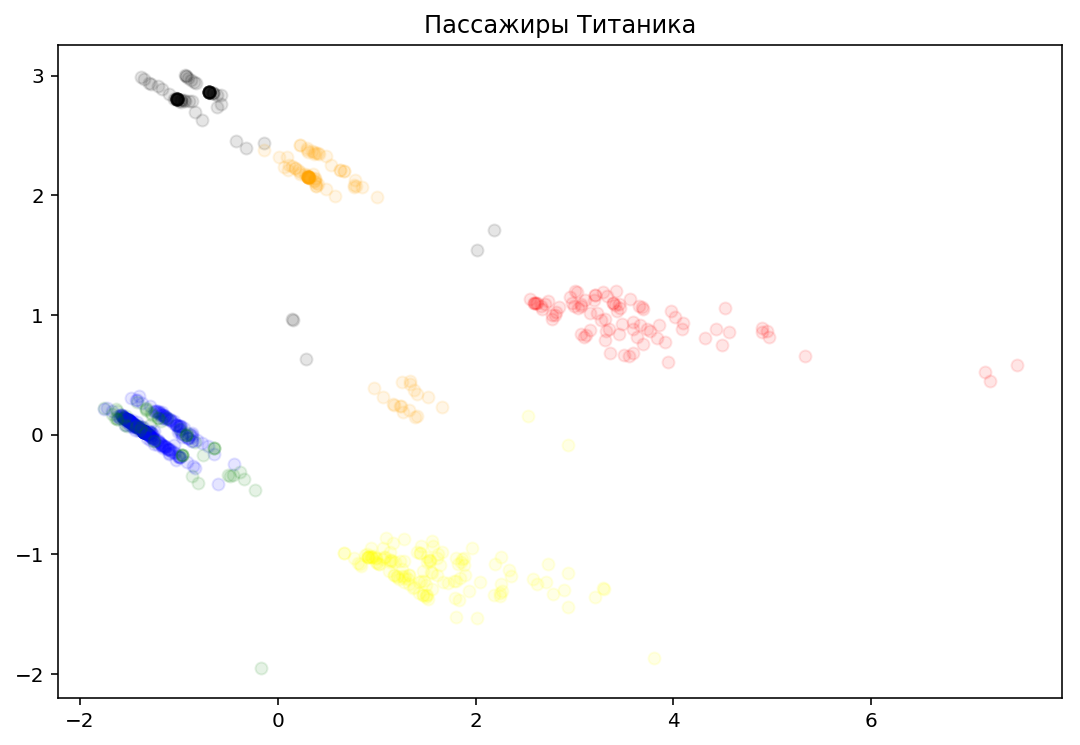

In [104]:
plt.title('Пассажиры Титаника')
for i,color in zip(range(n_clusters),{'blue','red','green','black','orange','yellow'}):
    t = ppl[cluster_labels==i]
    plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)

эти номера кластеров можно было бы подать как ещё одна фича

### Разделение на обучающую и тестирующую выборки

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train_imputed_scaled, y_train, test_size=0.2)

In [107]:
X_train_fin.shape

(712, 11)

In [108]:
X_val.shape

(179, 11)

In [109]:
X_test_imputed_scaled.shape

(418, 11)

In [110]:
y_train_fin.shape

(712,)

In [111]:
y_val.shape

(179,)

### Обучение с кросс-валидацией

кросс-валидация поможет нам подобрать лучший параметр регуляризации

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [113]:
cs = 10**np.linspace(-3,1,5)
cs

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [114]:
grid = {'C': cs}
gridsearch = GridSearchCV(LogisticRegression(solver='lbfgs'), grid, scoring='accuracy', cv=5, return_train_score=True)

In [115]:
%%time
gridsearch.fit(X_train_fin, y_train_fin)

Wall time: 421 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [117]:
#sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)

In [118]:
sorted(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['params']), key = lambda x: -x[0])

[(0.8089887640449438, {'C': 0.1}),
 (0.8061797752808989, {'C': 0.01}),
 (0.8047752808988764, {'C': 1.0}),
 (0.8047752808988764, {'C': 10.0}),
 (0.6615168539325843, {'C': 0.001})]

In [119]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00800242, 0.01293445, 0.00777974, 0.01250362, 0.01253533]),
 'std_fit_time': array([0.00108653, 0.0088858 , 0.00225671, 0.00401717, 0.00198304]),
 'mean_score_time': array([0.00154705, 0.00259862, 0.00121956, 0.00161438, 0.0016016 ]),
 'std_score_time': array([0.00042287, 0.00233935, 0.0004262 , 0.00048419, 0.0007932 ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1.0}, {'C': 10.0}],
 'split0_test_score': array([0.65034965, 0.7972028 , 0.82517483, 0.82517483, 0.82517483]),
 'split1_test_score': array([0.66433566, 0.7972028 , 0.76223776, 0.75524476, 0.75524476]),
 'split2_test_score': array([0.66197183, 0.79577465, 0.8028169 , 0.79577465, 0.79577465]),
 'split3_test_score': array([0.67605634, 0.80985915, 0.81690141, 0.80985915, 0.80985915]),
 'split4_test_score': array([0.65492958,

In [120]:
sorted(gridsearch.cv_results_['mean_test_score'])

[0.6615168539325843,
 0.8047752808988764,
 0.8047752808988764,
 0.8061797752808989,
 0.8089887640449438]

In [121]:
gridsearch.best_params_

{'C': 0.1}

In [122]:
best_C = gridsearch.best_params_["C"]

In [123]:
best_C

0.1

# Оценка точности

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
best_C = 0.1

In [126]:
clf = LogisticRegression(C=best_C, solver = 'lbfgs')

In [127]:
clf.fit(X_train_fin, y_train_fin)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [128]:
y_val_pred = clf.predict(X_val)

In [129]:
accuracy_score(y_val, y_val_pred)

0.7821229050279329

# Финальное предсказание

In [130]:
clf.fit(X_train_imputed_scaled, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

предсказание вероятностей принадлежности классу 0 и 1:

In [131]:
clf.predict_proba(X_test_imputed_scaled)[:10]

array([[0.87649901, 0.12350099],
       [0.6417722 , 0.3582278 ],
       [0.84954145, 0.15045855],
       [0.89260444, 0.10739556],
       [0.45480625, 0.54519375],
       [0.84381763, 0.15618237],
       [0.34253088, 0.65746912],
       [0.77537932, 0.22462068],
       [0.25178258, 0.74821742],
       [0.91741891, 0.08258109]])

предсказание номера класса:

In [132]:
predictions = clf.predict(X_test_imputed_scaled)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [133]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions)])

In [134]:
with open('submission.txt', 'w') as file:
    file.write(submussion)

In [135]:
for col, val in zip(X_train.columns, clf.coef_[0]):
    print("{:30} {:.2f}".format(col, val))

Age                            -0.43
SibSp                          -0.29
Parch                          -0.06
Fare                           0.13
isMale                         -1.18
Pclass_1                       0.43
Pclass_2                       0.09
Pclass_3                       -0.45
Embarked_C                     0.06
Embarked_Q                     0.03
Embarked_S                     -0.13


Регрессия позволяет посмотреть влияние различных факторов на принятое решение. Так, видно, что женский пол, маленький возраст и первый класс являлись сильными предпосылками к выживанию

### Проведём аналогичные действия с помощью дерева решений

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [173]:
param_grid = {'max_depth': np.arange(3, 10), 'min_samples_leaf': [1, 5, 10]}

In [174]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

In [175]:
X_train_fin.head()

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
513,1.870059,0.432793,-0.473674,0.547579,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710
479,-2.131568,-0.474545,0.767630,-0.401017,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
361,-0.053800,0.432793,-0.473674,-0.090272,0.737695,-0.565685,1.960202,-1.107926,2.074505,-0.307562,-1.614710
677,-0.900298,-0.474545,-0.473674,-0.450262,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
254,0.869652,-0.474545,2.008933,-0.241449,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306


In [177]:
%%time
tree.fit(X_train_fin, y_train_fin)

Wall time: 975 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [178]:
tree.cv_results_

{'mean_fit_time': array([0.00594296, 0.00369663, 0.00457892, 0.00366893, 0.00420585,
        0.00443196, 0.00419946, 0.00388732, 0.00521049, 0.00681853,
        0.00519776, 0.00476313, 0.00585175, 0.0048697 , 0.00379472,
        0.00416059, 0.00438366, 0.00606084, 0.00480852, 0.0041893 ,
        0.00519805]),
 'std_fit_time': array([0.00073883, 0.00204393, 0.00050237, 0.00188142, 0.00073958,
        0.00233334, 0.00099823, 0.00089881, 0.00132057, 0.00082183,
        0.00145578, 0.00096998, 0.00235012, 0.00128578, 0.00054076,
        0.00112293, 0.00148128, 0.00141471, 0.00100326, 0.00040004,
        0.00075877]),
 'mean_score_time': array([0.00254717, 0.00135965, 0.00158639, 0.00132604, 0.00136786,
        0.00140896, 0.0015944 , 0.00180087, 0.00217805, 0.00155821,
        0.00158348, 0.00179558, 0.0014092 , 0.00149155, 0.00153575,
        0.00119429, 0.00117378, 0.00179343, 0.00179534, 0.00200315,
        0.00158477]),
 'std_score_time': array([0.00043867, 0.00044779, 0.00050046, 0.00

In [179]:
best_depth = tree.best_params_["max_depth"]

In [181]:
best_sample_leaf = tree.best_params_["min_samples_leaf"]

In [182]:
clf_tree = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=best_sample_leaf)

In [183]:
clf_tree.fit(X_train_fin, y_train_fin)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [184]:
y_val_tree_pred = clf_tree.predict(X_val)

In [185]:
accuracy_score(y_val, y_val_tree_pred)

0.8044692737430168

In [186]:
roc_auc_score(y_val, y_val_tree_pred)

0.7372549019607841

#### сделаем предсказание с помощью "дерева"

In [147]:
clf_tree.fit(X_train_imputed_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [148]:
clf_tree.predict_proba(X_test_imputed_scaled)[:10]

array([[0.89208633, 0.10791367],
       [0.85714286, 0.14285714],
       [0.89208633, 0.10791367],
       [0.89208633, 0.10791367],
       [0.38181818, 0.61818182],
       [0.89208633, 0.10791367],
       [0.38181818, 0.61818182],
       [0.89208633, 0.10791367],
       [0.38181818, 0.61818182],
       [0.89208633, 0.10791367]])

In [149]:
predictions_tree = clf_tree.predict(X_test_imputed_scaled)
predictions_tree

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [150]:
submission_tree = 'PassengerId,Survived\n'
submission_tree += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions_tree)])

In [151]:
with open('submission.txt', 'w') as file:
    file.write(submission_tree)

In [152]:
clf_tree.feature_importances_

array([0.07296512, 0.04262917, 0.00787   , 0.07720752, 0.59672151,
       0.05315511, 0.        , 0.14945158, 0.        , 0.        ,
       0.        ])

In [153]:
for col, val in zip(X_train.columns, clf_tree.feature_importances_):
    print("{:30} {:.2f}".format(col, val))

Age                            0.07
SibSp                          0.04
Parch                          0.01
Fare                           0.08
isMale                         0.60
Pclass_1                       0.05
Pclass_2                       0.00
Pclass_3                       0.15
Embarked_C                     0.00
Embarked_Q                     0.00
Embarked_S                     0.00


#### визуализация дерева

In [154]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [155]:
lv = ['surv','notsurv']

In [156]:
get_tree_dot_view(clf_tree, list(X_train.columns), lv)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.309\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = surv", fillcolor="#e5813960"] ;
1 [label="Pclass_3 <= -0.103\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = notsurv", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= -2.093\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = notsurv", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="Fare <= 1.139\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = surv", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = notsurv", fillcolor="#399de5ff"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = surv", fillcolor="#e58139ff"] ;
3 -> 5 ;
6 [label="Fare <= -0.067\ngini = 0.091\nsamples = 168\nvalue = [8, 160]\nclass = notsurv", fillcolor="#399de5f2"] ;
2 -> 6 ;
7 [label="gini = 0.182\nsamples = 69\nvalue = [7, 62]\nclass = notsurv